/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
/opt/Miniconda/envs/jannis_env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


splitting data...
fitting data...
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   17.5s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:  2.5min
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:  6.4min
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed: 11.7min
[Parallel(n_jobs=20)]: Done 1000 out of 1000 | elapsed: 15.4min finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    1.9s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    4.6s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    8.4s
[Parallel(n_jobs=20)]: Done 1000 out of 1000 | elapsed:   10.9s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=20)]: Done 160 tasks      | elaps

predicting data...


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    1.9s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    4.6s
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed:    8.3s
[Parallel(n_jobs=20)]: Done 1000 out of 1000 | elapsed:   10.8s finished


best params: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 1000}
accurracy: 1.0


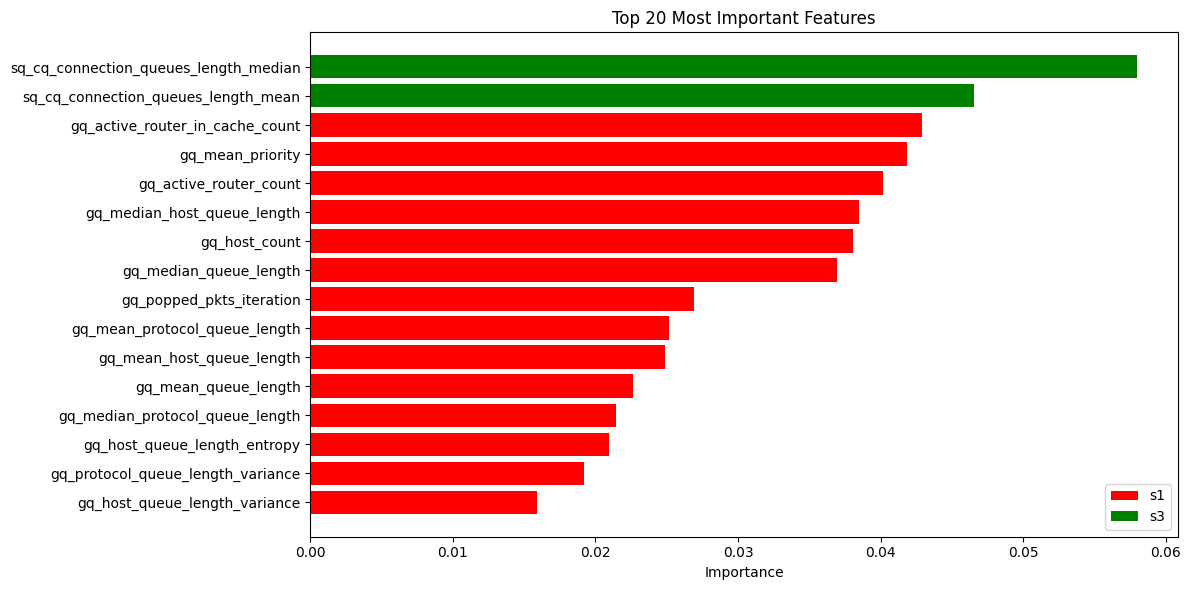

In [1]:
import data_analysis.data_processing as dp
import data_analysis.data_learning as dl
import gc

# reload module to bypass caching
import importlib
importlib.reload(dp)
importlib.reload(dl)

# paths
test_window_path_home = dp.Path(r'\\?\C:\Users\jannis\Documents\HSP_IDS\Material\Aktuell\2025-02-17_11-14-33_192.168.1.0-normal_1\1554220324.748197-1554220354.748197') # treat it as a long path to avoid path length issues on windows
test_window_path_remote = dp.Path(r'/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-03-04_00-03-20_192.168.1.0-normal_DDoS_1/1556203726.876922-1556203756.876922')

data_set_path = dp.Path(r'/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes')
ddos_test_path_parquet = dp.Path(r'/home/hsp252/Development/DDoS')

# get connection-based fvs from parquet
fvs = dp.pd.DataFrame()
labels = dp.pd.DataFrame()

ddos_fvs = dp.read_parquet('/home/hsp252/Development/intrusion_sorted/DDoS/intrusion_normal_DDoS_10_final.parquet')
fvs = dp.pd.concat([fvs, ddos_fvs])
labels = dp.pd.concat([labels, dp.pd.DataFrame({'attack_type': ['ddos'] * ddos_fvs.shape[0]})])
del ddos_fvs
gc.collect()

dos_fvs = dp.read_parquet('/home/hsp252/Development/intrusion_sorted/DoS/intrusion_normal_DoS_1_final.parquet')
fvs = dp.pd.concat([fvs, dos_fvs])
labels = dp.pd.concat([labels, dp.pd.DataFrame({'attack_type': ['ddos'] * dos_fvs.shape[0]})])
del dos_fvs
gc.collect()

injection_fsv = dp.read_parquet('/home/hsp252/Development/intrusion_sorted/injection/intrusion_injection_normal1_final.parquet')
fvs = dp.pd.concat([fvs, injection_fsv])
labels = dp.pd.concat([labels, dp.pd.DataFrame({'attack_type': ['injection'] * injection_fsv.shape[0]})])
del injection_fsv
gc.collect()

mitm_fvs = dp.read_parquet('/home/hsp252/Development/intrusion_sorted/mitm/intrusion_MITM_normal1_final.parquet')
fvs = dp.pd.concat([fvs, mitm_fvs])
labels = dp.pd.concat([labels, dp.pd.DataFrame({'attack_type': ['mitm'] * mitm_fvs.shape[0]})])
del mitm_fvs
gc.collect()

runsomware_fvs = dp.read_parquet('/home/hsp252/Development/intrusion_sorted/runsomware/intrusion_normal_runsomware1_final.parquet')
fvs = dp.pd.concat([fvs, runsomware_fvs])
labels = dp.pd.concat([labels, dp.pd.DataFrame({'attack_type': ['runsomware'] * runsomware_fvs.shape[0]})])
del runsomware_fvs
gc.collect()

scanning_fvs =  dp.read_parquet('/home/hsp252/Development/intrusion_sorted/scanning/intrusion_normal_scanning1_final.parquet')
fvs = dp.pd.concat([fvs, scanning_fvs])
labels = dp.pd.concat([labels, dp.pd.DataFrame({'attack_type': ['scanning'] * scanning_fvs.shape[0]})])
del scanning_fvs
gc.collect()

normal_fvs = dp.read_parquet('/home/hsp252/Development/benign/benign_normal_10_final.parquet')
fvs = dp.pd.concat([fvs, normal_fvs])
labels = dp.pd.concat([labels, dp.pd.DataFrame({'attack_type': ['normal'] * normal_fvs.shape[0]})])
del normal_fvs
gc.collect()

# data and program use 46gb of RAM with one core, 55gb with 20 cores in GridSearch

# create and train rfc
best_params, predictions, accuracy, feature_importances = dl.rfc(fvs, labels)

print(f"best params: {best_params}")
print(f"accurracy: {accuracy}")

# plot feature importances
feature_importance_df = dp.pd.DataFrame({'feature': fvs.columns, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
important_features = feature_importance_df['feature'][:20][::-1].to_numpy()
important_features_values = feature_importance_df['importance'][:20][::-1].to_numpy()

s1_cols = dl.get_feature_names_from_csv('/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-02-28_08-41-32_192.168.1.0-normal_backdoor/1556466432.434372-1556466462.434372/s1_general_qs.csv').to_list()
connection_cols = dl.get_feature_names_from_csv('/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-02-28_08-41-32_192.168.1.0-normal_backdoor/1556466432.434372-1556466462.434372/192.168.1.152/connections/1556466432.434372-1556466442.434372/96.0_192.168.1.193_49338.0_192.168.1.152_1880.0/host_data_chunk_full.csv').to_list()
s2_cols = dl.get_feature_names_from_csv('/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-02-28_08-41-32_192.168.1.0-normal_backdoor/1556466432.434372-1556466462.434372/192.168.1.152/s2_selected_qs.csv').to_list()
s3_cols = dl.get_feature_names_from_csv('/home/hsp252/nas_mount/hunter.ids.data/hunter.ids.preprocessor/processed_dataframes/angriff/2025-02-28_08-41-32_192.168.1.0-normal_backdoor/1556466432.434372-1556466462.434372/192.168.1.152/s3_connection_qs.csv').to_list()

s1_mask = [i for i, feature in enumerate(important_features) if feature in s1_cols]
s2_mask = [i for i, feature in enumerate(important_features) if feature in s2_cols]
s3_mask = [i for i, feature in enumerate(important_features) if feature in s3_cols]
connection_mask = [i for i, feature in enumerate(important_features) if feature in connection_cols]

dp.plt.figure(figsize=(12, 6))
if s1_mask:
        dp.plt.barh(important_features[s1_mask], important_features_values[s1_mask], color = 'red', label='s1')
if s2_mask:
        dp.plt.barh(important_features[s2_mask], important_features_values[s2_mask], color = 'blue', label='s2')
if s3_mask:
        dp.plt.barh(important_features[s3_mask], important_features_values[s3_mask], color = 'green', label='s3')
if connection_mask:
        dp.plt.barh(important_features[connection_mask], important_features_values[connection_mask], color = 'orange', label='connection')
dp.plt.xlabel("Importance")
dp.plt.title("Top 20 Most Important Features")
dp.plt.tight_layout()
dp.plt.legend()
dp.plt.show()

# TODO: even amount of samples per attack type
# TODO: store trained and optimized rfc in a pickle-file and test on unseen data